In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
big_block = pd.read_csv('/home/lin/教材/Financial_data/data/finance_M4/Daily-train.csv')

In [3]:
big_block.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
big_block.set_index('V1', inplace = True)

In [5]:
fx_data = big_block.loc['D3450']

In [6]:
fx_data.head()

V2    4915.1
V3    4867.6
V4    4679.8
V5    4595.8
V6    4609.2
Name: D3450, dtype: float64

In [7]:
lastNumber = fx_data.last_valid_index()
lastNumber

'V4198'

In [8]:
my_data = fx_data.loc[fx_data.isnull().values == False]

In [9]:
my_data.head()

V2    4915.1
V3    4867.6
V4    4679.8
V5    4595.8
V6    4609.2
Name: D3450, dtype: float64

In [10]:
my_data.tail()

V4194    14845.7
V4195    14883.9
V4196    14887.0
V4197    14988.5
V4198    15093.4
Name: D3450, dtype: float64

In [11]:
my_data.size

4197

In [12]:
type(my_data)

pandas.core.series.Series

In [13]:
my_data.to_csv('/home/lin/教材/Financial_data/data/finance_M4/my_fx_data')

In [14]:
my_data.describe()

count     4197.000000
mean      8665.180105
std       2891.102233
min       3613.400000
25%       5867.900000
50%       8626.700000
75%      10569.800000
max      15178.000000
Name: D3450, dtype: float64

In [15]:
my_data.dtypes

dtype('float64')

In [16]:
M4 = pd.read_csv('/home/lin/教材/Financial_data/data/finance_M4/M4-info.csv')

In [17]:
M4.head()

,M4id,category,Frequency,Horizon,SP
0,Y1,Macro,1,6,Yearly
1,Y2,Macro,1,6,Yearly
2,Y3,Macro,1,6,Yearly
3,Y4,Macro,1,6,Yearly
4,Y5,Macro,1,6,Yearly


In [18]:
M4.set_index('M4id', inplace = True)

In [19]:
M4.loc['D3450']

category     Finance
Frequency          1
Horizon           14
SP             Daily
Name: D3450, dtype: object

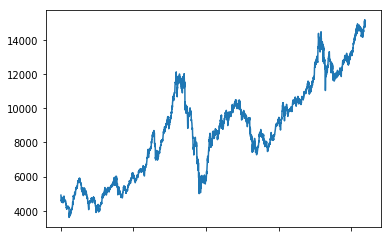

In [20]:
my_data.plot()

In [21]:
logR = np.log(my_data).diff()
logR.head()

V2         NaN
V3   -0.009711
V4   -0.039346
V5   -0.018113
V6    0.002911
Name: D3450, dtype: float64

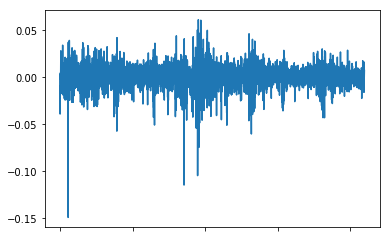

In [22]:
logR.plot()

In [23]:
logR.drop(logR.index[0], inplace = True)

In [24]:
logR.head()

V3   -0.009711
V4   -0.039346
V5   -0.018113
V6    0.002911
V7   -0.002259
Name: D3450, dtype: float64

In [25]:
logR.describe()

count    4196.000000
mean        0.000267
std         0.012079
min        -0.149340
25%        -0.005606
50%         0.000742
75%         0.006732
max         0.060968
Name: D3450, dtype: float64

Text(0.5,1,'Histogram of log-retunrs and Gaussian with the same mean and variance')

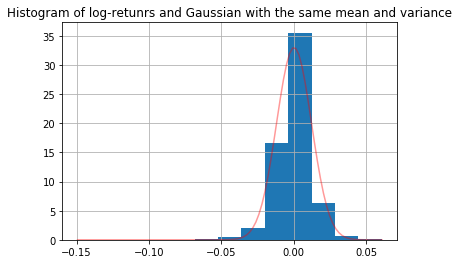

In [26]:
numbins = int(1+ np.log2(logR.count())) 
logR.hist(bins = numbins, normed=True)

mu_log = np.mean(logR)
sigma_log = np.std(logR)
x_ticks = np.linspace(min(logR), max(logR),100)
plt.plot(x_ticks, 1./((2.*np.pi)**0.5 *sigma_log)*np.exp(-((x_ticks - mu_log)/sigma_log)**2/2), 'r', alpha = 0.4)
plt.title('Histogram of log-retunrs and Gaussian with the same mean and variance')


In [27]:
#%save get_data_and_take_a_look 1-25

In [28]:
#the check and nomalize data should be one function
normedData = (logR - min(logR)) / (max(logR) - min(logR))
normedData.describe()

count    4196.000000
mean        0.711373
std         0.057433
min         0.000000
25%         0.683445
50%         0.713630
75%         0.742110
max         1.000000
Name: D3450, dtype: float64

In [29]:
numSmoothingFactor = 200
#this guy should be a input to the optimized bin number function, it should also take nomalized data
scores = np.zeros(numSmoothingFactor)
binNums = range(1,numSmoothingFactor + 1)

In [30]:
for binNum in binNums:
    frequen, binEdges = np.histogram(normedData, bins = binNum)
    numObser = normedData.count().astype(float)
    proEst = frequen / numObser
    sumFreqSqua = np.sum(proEst ** 2)
    score = ((2. * binNum) / ( numObser - 1.)) - (sumFreqSqua * (numObser + 1.) * binNum/ (numObser - 1.))
    scores[binNum - 1] = score

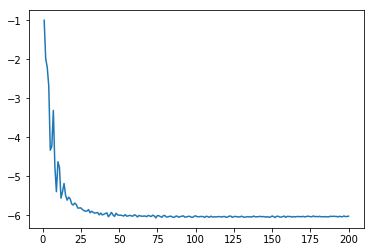

In [31]:
plt.plot(binNums, scores)

In [ ]:
logR.hist(bins = 3, normed=True)

In [ ]:
logR.hist(bins = 60, normed=True)

In [ ]:
logR.hist(bins = 200, normed=True)

In [ ]:
# I don't understand why the "optimal" bin number is so low, I know this is a score that try to estimate the loss function
# which is the sum of squared bias and variance of the model. And over smooth relates to low var and high bias,
# undersmooth relates to low bias and high var of model. This data looks not too far away from Gaussian anyway, and the
# and the example from the text book is very far way. Does it mean when data is close to Guassion this method tends to
# over smooth?
#Ture out the text book I used has the wrong fomula

In [ ]:
test_data = np.array([-7., -5, 1, 4, 5])

In [ ]:
type(test_data[1])

In [ ]:
#test_data = logR

In [ ]:
numInDen = 5000
domain = np.linspace(min(test_data) - 3, max(test_data) + 3, numInDen)
fx = np.zeros(numInDen)
kernels = np.zeros([domain.size, test_data.size])

In [ ]:
obsNum = test_data.size

In [ ]:
bandW = 0.1
for i in range(numInDen):
    kernel = 1. / ((2. * np.pi) ** 0.5) * np.exp(-((domain[i]- test_data) / bandW) ** 2 / 2)
    kernels[i] = kernel
    fx[i] = (1. / (obsNum * bandW)) * np.sum(kernel)

In [ ]:
#%matplotlib qt
plt.plot(domain, fx, 'b')
plt.grid(True)
#plt.xlim((-.5, .5))
#plt.plot(domain, kernels)

In [ ]:
test_data = my_data[: 200]
obsNum = test_data.size
diffs = np.zeros([test_data.size, test_data.size])
for i in range(test_data.size):
    diffs[i] = test_data[i] - test_data
    
bandRange = np.linspace(0.001, 10, 100)
kerScores = np.zeros(bandRange.size)
firstHalf = np.zeros(bandRange.size)
secondHalf = np.zeros(bandRange.size)
totalKer = np.zeros(bandRange.size)

for i in range(bandRange.size):
    bandW = bandRange[i]
    kernelStars = 1. / ((4. * np.pi) ** 0.5) * np.exp(-((diffs / bandW) ** 2 / 4)) - (2. / ((2. * np.pi) ** 0.5)) * np.exp(-((diffs / bandW) ** 2 / 2))
    #plt.plot(kernelStars)
    #plt.legend()
    #plt.show()
    totalKernels = np.sum(kernelStars)
    #print(totalKernels / obsNum ** 2)
    scoreBandW = (1. / (bandW * obsNum ** 2)) * totalKernels + (2. / (obsNum * bandW)) * (1. / ((2. * np.pi) ** 0.5))
    kerScores[i] = scoreBandW
    firstHalf[i] = (1. / (bandW * obsNum ** 2)) * totalKernels
    secondHalf[i] = (2. / (obsNum * bandW)) * (1. / ((2. * np.pi) ** 0.5))
    totalKer[i]  = totalKernels / (obsNum ** 2)

In [ ]:
plt.loglog(bandRange, kerScores)

In [ ]:
plt.plot(bandRange, firstHalf, 'b')
plt.plot(bandRange, secondHalf, 'r')
plt.ylim((-5, 5))
plt.grid(True)

In [ ]:
plt.plot(bandRange, (totalKer/ obsNum **2) )